<a href="https://colab.research.google.com/github/Ochan-LOKIDORMOI/Water_Quality_Model/blob/main/Peer_Learning_group2_Regularization_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
from tensorflow.keras.layers import Dropout

In [ ]:
data = '/content/drive/MyDrive/water_potability.csv'
df = pd.read_csv(data)

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


##**Data Cleaning**

In [ ]:
data = df.shape
print(data)

(3276, 10)


In [ ]:
data = df.info()
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [ ]:
data = df.isna().sum()
print(data)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


##**Filling in the missing NaN values**

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#**Checking correlation using heatmap**

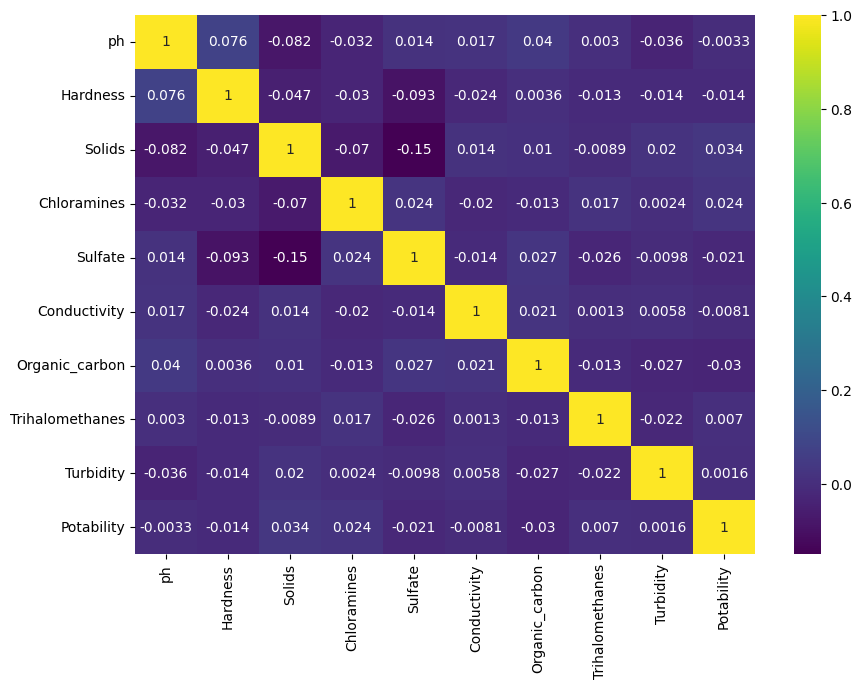

In [ ]:
# Plot the heatmap fig
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()


##In the above heatmap, there is no two or more variables correlated with each other.
##Therefore, there is no need to apply dimensional reduction

#**Checking the outliers using Boxplot**

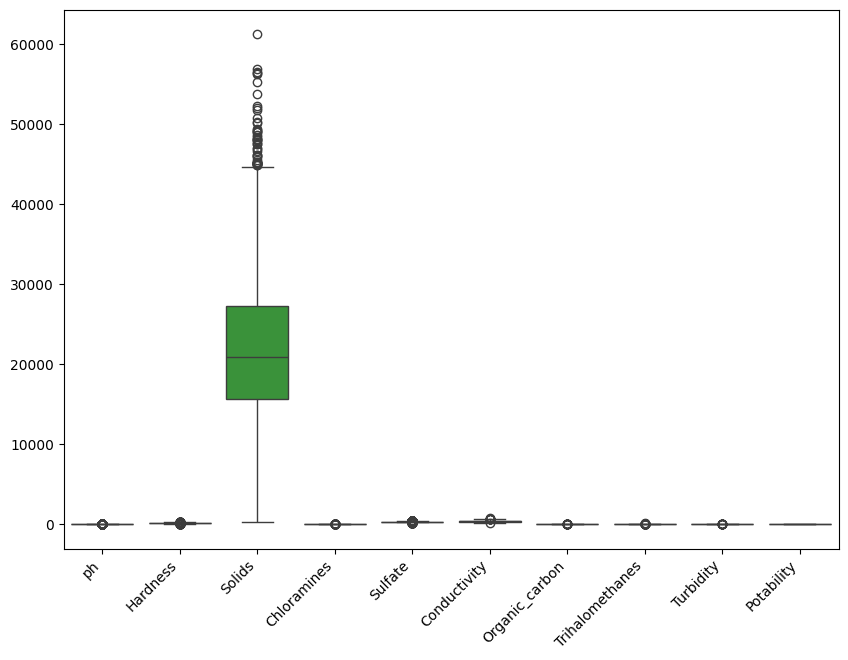

(None,)

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(10, 7))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')
plt.show(),

In [ ]:
df['Solids'].describe()

,Solids
count,3276.000000
mean,22014.092526
std,8768.570828
min,320.942611
25%,15666.690297
50%,20927.833607
75%,27332.762127
max,61227.196008


In the above Boxplot, there is outliers in the solids.
In this case, we need to standardize the data.
This will centered the data around zero with unit variance.
Outliers are retained to preserve data integrity and variability, ensuring the model captures all potential patterns and anomalies crucial for accurate predictions.

#**Partitioning the data and standardization**

###**Separating features (X) and target (y)**

In [ ]:
X = df.drop('Potability', axis=1)
y = df['Potability']
print(X.shape)
print(y.shape)

(3276, 9)
(3276,)


###**Scaling the data**

In [ ]:
# Initializung the StandardScaler, fitting and transforming the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())
print(X_scaled_df.shape)

             ph  Hardness    Solids  Chloramines       Sulfate  Conductivity  \
0 -6.043133e-16  0.259195 -0.139471     0.112415  9.613574e-01      1.708954   
1 -2.289339e+00 -2.036414 -0.385987    -0.307694  3.145987e-15      2.062575   
2  6.928678e-01  0.847665 -0.240047     1.360594  3.145987e-15     -0.094032   
3  8.409504e-01  0.547651  0.000493     0.592008  6.395190e-01     -0.778830   
4  1.368569e+00 -0.464429 -0.460249    -0.363698 -6.541765e-01     -0.343939   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -1.180651         1.306149  -1.286298  
1        0.270597        -0.638480   0.684218  
2        0.781117         0.001509  -1.167365  
3        1.255134         2.152874   0.848412  
4       -0.824357        -2.181599   0.138786  
(3276, 9)


In [ ]:
X_scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

Plot the Data Appropriately

##**1. First Model: Vanilla Model Implementation**


In [ ]:

#Initializing the StandardScaler, fit
scaler = StandardScaler()
#This will create a new scaler object
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
trainX, testX, trainY, testY = train_test_split(X_scaled_df, y, test_size=0.2, random_state=101)


In [ ]:
model_1 = Sequential([Dense(64,activation="relu", input_shape=(trainX.shape[1],)), Dense(32,activation="relu"), Dense(1,activation="sigmoid")])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
model_1.summary()
#  train the model
history1 = model_1.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32, verbose=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6131 - loss: 0.6690 - val_accuracy: 0.6448 - val_loss: 0.6501
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6373 - loss: 0.6510 - val_accuracy: 0.6585 - val_loss: 0.6279
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6639 - loss: 0.6238 - val_accuracy: 0.6753 - val_loss: 0.6097
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6750 - loss: 0.6082 - val_accuracy: 0.6799 - val_loss: 0.5982
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6855 - loss: 0.5923 - val_accuracy: 0.6875 - val_loss: 0.5918
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6961 - loss: 0.5821 - val_accuracy: 0.6951 - val_loss: 0.5891
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6966 - loss: 0.5731 - val_accuracy: 0.6936 - val_loss: 0.5903
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6983 - loss: 0.5674 - val_accuracy: 0.6921 - v

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Shape of testY: (656,)
Shape of predictions: (656, 1)
Confusion Matrix


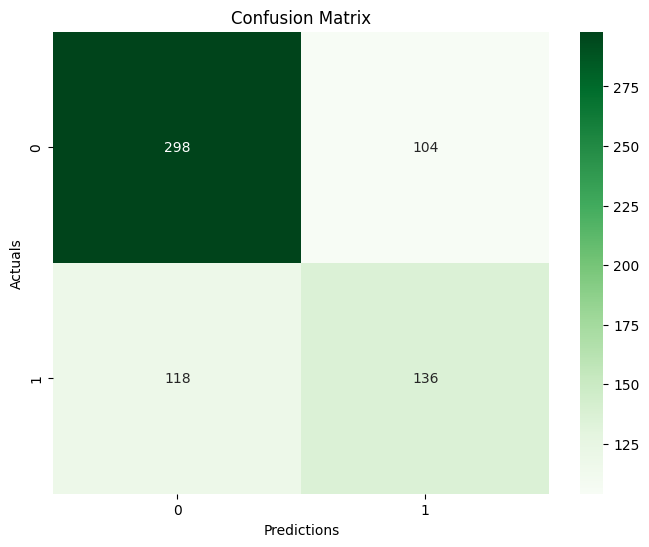

In [ ]:
# A confusion matrix  for the vanilla model
predictions = model_1.predict(testX)
predictions = np.round(predictions)

# Now check if both testY and predictions have the same shape
print(f"Shape of testY: {testY.shape}")
print(f"Shape of predictions: {predictions.shape}")

print("Confusion Matrix")
cm = confusion_matrix(testY, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

This confusion matrix shows that 321 times, the model predicted class 0 as the actual class value 0. 132 times, it predicted class value 1 as class value 0. 86 times, it predicted class value 0 as calss value 1. Lastly 122 times it predicted our class value 1 as 1. At that point we can see our model is not performing very great but manageable
.

##**2. Second model with L1 regularisation with early stopping and Adam optimiser**

Here, I will use early stopping with L1 to see if the model performance increases. Also this uses Adam optimiser.

In [ ]:
model_2 = Sequential([
    Dense(64, activation="relu", input_shape=(trainX.shape[1],), kernel_regularizer=l1(0.01)),
    Dense(32, activation="relu", kernel_regularizer=l1(0.1)),
    Dense(1, activation="sigmoid")
])

early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

model_2.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

model_2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2 = model_2.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5919 - loss: 26.5731 - val_accuracy: 0.5884 - val_loss: 25.3068
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5856 - loss: 24.9014 - val_accuracy: 0.6006 - val_loss: 23.6888
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6127 - loss: 23.2959 - val_accuracy: 0.6052 - val_loss: 22.1261
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6140 - loss: 21.7468 - val_accuracy: 0.6128 - val_loss: 20.6168
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6206 - loss: 20.2532 - val_accuracy: 0.6159 - val_loss: 19.1704
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6081 - loss: 18.8235 - val_accuracy: 0.6159 - val_loss: 17.7719
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6192 - loss: 17.4325 - val_accuracy: 0.6189 - val_loss: 16.4204
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5977 - loss: 16.0956 - val_accur

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Shape of testY: (656,)
Shape of predictions: (656, 1)
Confusion Matrix


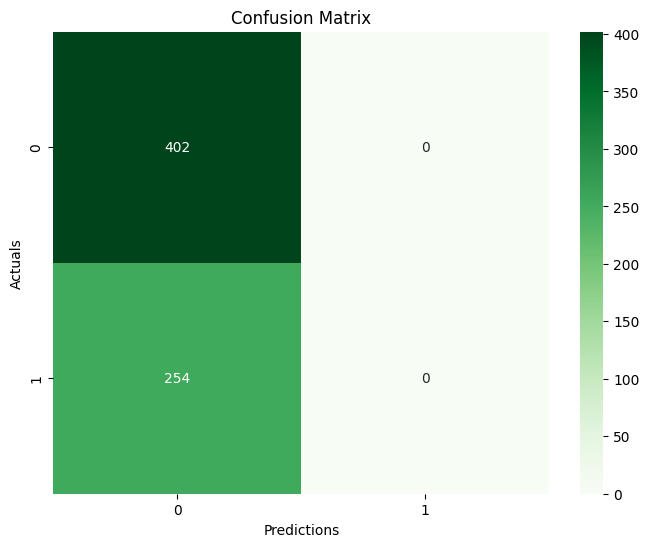

In [ ]:
# Visualising with a confusion matrix
predictions = model_2.predict(testX)
predictions = np.round(predictions)

# Now check if both testY and predictions have the same shape
print(f"Shape of testY: {testY.shape}")
print(f"Shape of predictions: {predictions.shape}")



print("Confusion Matrix")
cm = confusion_matrix(testY, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

## Unlike the first model, this confusion matrix shows that the model cannot accurately predict class 1 (positive class) and is heavily skewed toward class 0 (negative class).

## **3. Using L1 with RMSPOP Optimiser**

In [ ]:
# Compile the model
model_3 = Sequential([
    Dense(64, activation="relu", input_shape=(trainX.shape[1],), kernel_regularizer=l1(0.01)),
    Dense(32, activation="relu", kernel_regularizer=l1(0.1)),
    Dense(1, activation="sigmoid")
])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Compile the model using RMSprop optimizer
model_3.compile(optimizer=RMSprop(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

# Model summary
model_3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history3 = model_3.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32,  callbacks=[early_stopping],verbose=1)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4310 - loss: 26.6297 - val_accuracy: 0.4878 - val_loss: 25.3031
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4684 - loss: 24.8911 - val_accuracy: 0.5137 - val_loss: 23.6569
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4893 - loss: 23.2594 - val_accuracy: 0.5412 - val_loss: 22.0628
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5315 - loss: 21.6786 - val_accuracy: 0.5518 - val_loss: 20.5251
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5597 - loss: 20.1534 - val_accuracy: 0.5838 - val_loss: 19.0468
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5814 - loss: 18.6886 - val_accuracy: 0.5884 - val_loss: 17.6257
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5770 - loss: 17.2859 - val_accuracy: 0.6021 - val_loss: 16.2651
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5918 - loss: 15.9402 - val_accur

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Shape of testY: (656,)
Shape of predictions: (656, 1)
Confusion Matrix


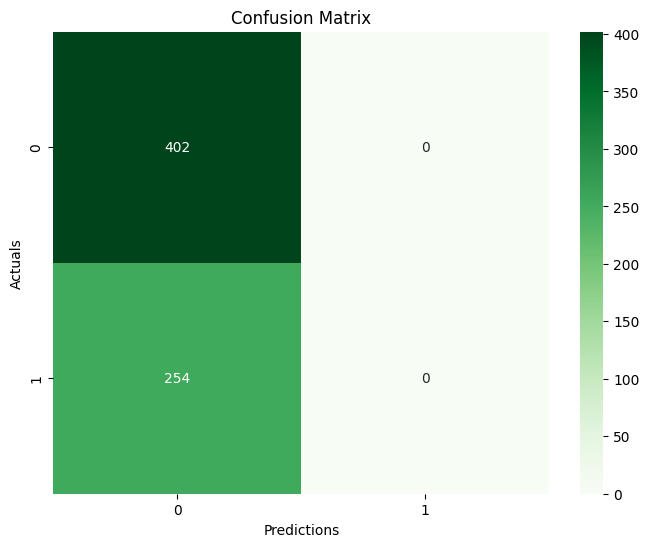

In [ ]:
# Visualising with a confusion matrix
predictions = model_3.predict(testX)
predictions = np.round(predictions)

# Now check if both testY and predictions have the same shape
print(f"Shape of testY: {testY.shape}")
print(f"Shape of predictions: {predictions.shape}")

# Confusion Matrix
print("Confusion Matrix")
cm = confusion_matrix(testY, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

## Even though the rmspop optimiser increased the training accuracy a little bit, it did nothing to the confusion matrix.

## **4. Using L1 without Early Stopping**

In [ ]:
model_4 = Sequential([
    Dense(64, activation="relu", input_shape=(trainX.shape[1],), kernel_regularizer=l1(0.01)),
    Dense(32, activation="relu", kernel_regularizer=l1(0.1)),
    Dense(1, activation="sigmoid")
])

model_4.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

model_4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history4 = model_4.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4628 - loss: 26.7770 - val_accuracy: 0.4970 - val_loss: 25.4984
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4874 - loss: 25.0895 - val_accuracy: 0.5320 - val_loss: 23.8545
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5249 - loss: 23.4552 - val_accuracy: 0.5503 - val_loss: 22.2579
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5378 - loss: 21.8755 - val_accuracy: 0.5732 - val_loss: 20.7174
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5537 - loss: 20.3506 - val_accuracy: 0.5869 - val_loss: 19.2379
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5816 - loss: 18.8818 - val_accuracy: 0.6052 - val_loss: 17.8132
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5966 - loss: 17.4701 - val_accuracy: 0.6128 - val_loss: 16.4420
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5930 - loss: 16.1156 - val_accur

## **5. L2 Regularisation model without early stopping**

In [ ]:
model_5 = Sequential([
    Dense(64, activation="relu", input_shape=(trainX.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(32, activation="relu", kernel_regularizer=l2(0.1)),
    Dense(1, activation="sigmoid")
])


# Compile the model with Adam
model_5.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])



# Print model summary
model_5.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history5 = model_5.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6158 - loss: 5.1714 - val_accuracy: 0.6128 - val_loss: 4.8580
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6071 - loss: 4.7711 - val_accuracy: 0.6128 - val_loss: 4.4831
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6021 - loss: 4.4047 - val_accuracy: 0.6143 - val_loss: 4.1393
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5857 - loss: 4.0740 - val_accuracy: 0.6174 - val_loss: 3.8241
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6069 - loss: 3.7586 - val_accuracy: 0.6143 - val_loss: 3.5348
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6116 - loss: 3.4714 - val_accuracy: 0.6143 - val_loss: 3.2694
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6048 - loss: 3.2131 - val_accuracy: 0.6143 - val_loss: 3.0260
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6229 - loss: 2.9693 - val_accuracy: 0.6143 - v

#### Visualising confusion Matrix of the 5th model

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Shape of testY: (656,)
Shape of predictions: (656, 1)
Confusion Matrix


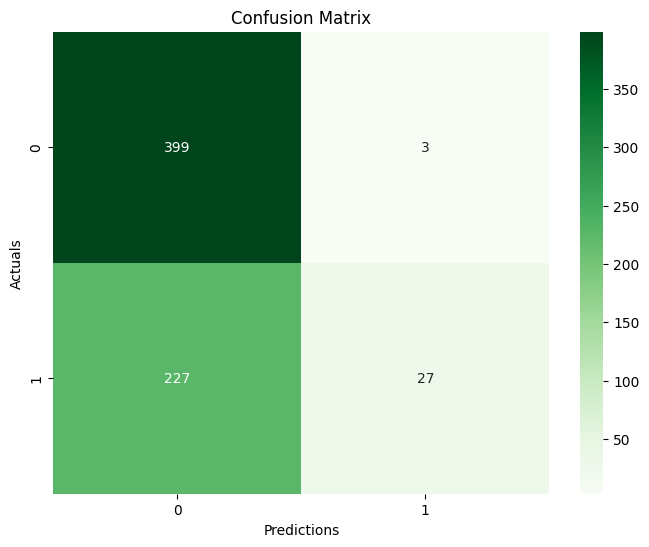

In [ ]:
# Visualising with a confusion matrix
predictions = model_5.predict(testX)
predictions = np.round(predictions)

# Now check if both testY and predictions have the same shape
print(f"Shape of testY: {testY.shape}")
print(f"Shape of predictions: {predictions.shape}")

# Confusion Matrix
print("Confusion Matrix")
cm = confusion_matrix(testY, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

This confusion matrix shows that 400 times, the model predicted class 0 as the actual class value 0. 236 times, it predicted class value 1 as class value 0. 2 times, it predicted class value 0 as calss value 1. Lastly 18 times it predicted our class value 1 as 1.

## 6. L2   with RMSPOP Optimiser





In [ ]:
# Compile the model
model_6 = Sequential([
    Dense(64, activation="relu", input_shape=(trainX.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(32, activation="relu", kernel_regularizer=l2(0.1)),
    Dense(1, activation="sigmoid")
])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Compile the model using RMSprop optimizer
model_6.compile(optimizer=RMSprop(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

# Model summary
model_6.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the sixth model
history6 = model_6.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32,  callbacks=[early_stopping],verbose=1)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5418 - loss: 4.9047 - val_accuracy: 0.5671 - val_loss: 4.5951
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5847 - loss: 4.4954 - val_accuracy: 0.5716 - val_loss: 4.2224
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5598 - loss: 4.1388 - val_accuracy: 0.5869 - val_loss: 3.8748
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5638 - loss: 3.7951 - val_accuracy: 0.5976 - val_loss: 3.5508
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5940 - loss: 3.4720 - val_accuracy: 0.5945 - val_loss: 3.2501
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5863 - loss: 3.1821 - val_accuracy: 0.6021 - val_loss: 2.9716
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6078 - loss: 2.9057 - val_accuracy: 0.6113 - val_loss: 2.7141
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5934 - loss: 2.6567 - val_accuracy: 0.6128 - v

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Shape of testY: (656,)
Shape of predictions: (656, 1)
Confusion Matrix


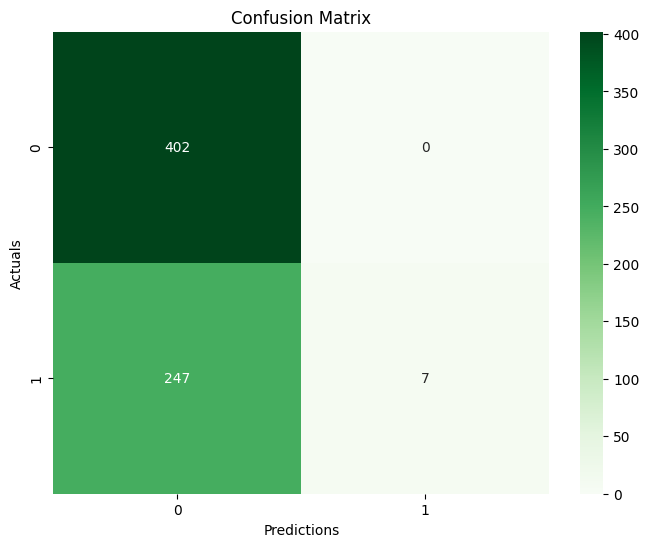

In [ ]:
# Visualising with a confusion matrix
predictions = model_6.predict(testX)
predictions = np.round(predictions)

# Now check if both testY and predictions have the same shape
print(f"Shape of testY: {testY.shape}")
print(f"Shape of predictions: {predictions.shape}")

# Confusion Matrix
print("Confusion Matrix")
cm = confusion_matrix(testY, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

## 7. L2 with drop out

Implementing L2 with drop out to check if the acccuracy is better

In [ ]:

model_7 = Sequential(
    [
        Dense(64, activation="relu", input_shape=(trainX.shape[1],), kernel_regularizer=l2(0.001)),
        Dropout(0.4),

        Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
        Dropout(0.3),

        Dense(1, activation="sigmoid")
    ]
    )

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)

# Compile the model using RMSprop optimizer
model_7.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Model summary
model_7.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the seveth model
history7 = model_7.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32,  callbacks=[early_stopping, reduce_lr],verbose=1)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5319 - loss: 0.7672 - val_accuracy: 0.6159 - val_loss: 0.7197 - learning_rate: 0.0010
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6152 - loss: 0.7365 - val_accuracy: 0.6296 - val_loss: 0.7073 - learning_rate: 0.0010
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6151 - loss: 0.7179 - val_accuracy: 0.6280 - val_loss: 0.6986 - learning_rate: 0.0010
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6247 - loss: 0.7059 - val_accuracy: 0.6265 - val_loss: 0.6900 - learning_rate: 0.0010
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6276 - loss: 0.6974 - val_accuracy: 0.6524 - val_loss: 0.6798 - learning_rate: 0.0010
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6321 - loss: 0.6866 - val_accuracy: 0.6540 - val_loss: 0.6710 - learning_rate: 0.0010
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6315 - loss: 0.6864 - val_acc

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Shape of testY: (656,)
Shape of predictions: (656, 1)
Confusion Matrix


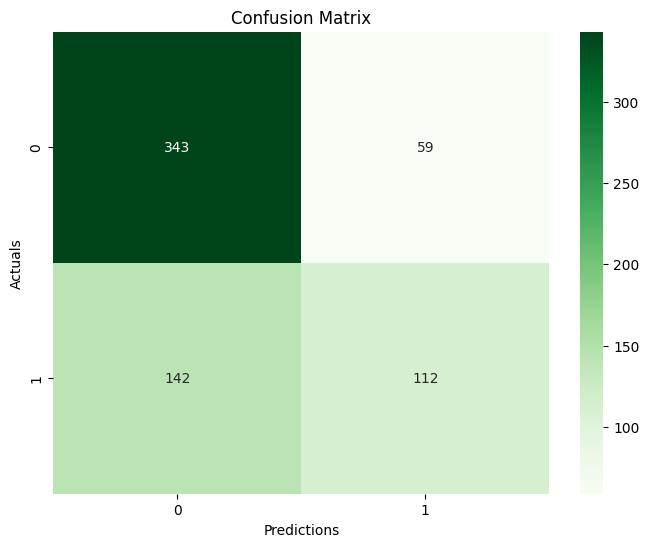

In [ ]:
# Visualising with a confusion matrix
predictions = model_7.predict(testX)
predictions = np.round(predictions)

# Now check if both testY and predictions have the same shape
print(f"Shape of testY: {testY.shape}")
print(f"Shape of predictions: {predictions.shape}")

# Confusion Matrix
print("Confusion Matrix")
cm = confusion_matrix(testY, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

## **Model Evaluation**

In [ ]:
# Model Evaluation
def evaluate_model(model, testX, testY):
    """
    Evaluates the model on the test dataset and prints the loss and accuracy.

    Parameters:
    model: The trained model to be evaluated.
    testX: Test data (features).
    testY: Test labels (targets).

    Returns:
    test_loss: Loss of the model on the test set.
    test_accuracy: Accuracy of the model on the test set.
    """
    evaluation = model.evaluate(testX, testY, verbose=0)  # Evaluate without printing unnecessary details
    test_loss = evaluation[0]
    test_accuracy = evaluation[1]

    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

    return test_loss, test_accuracy


In [ ]:
test_loss, test_accuracy = evaluate_model(model_7, testX, testY)

Test Loss: 0.6040183305740356, Test Accuracy: 0.6935975551605225


In [ ]:
# See the first row of testX
first_row = testX.iloc[0]
print(first_row)

ph                -0.915181
Hardness          -1.157446
Solids             0.381982
Chloramines        0.383060
Sulfate            1.211152
Conductivity       1.758403
Organic_carbon    -0.199037
Trihalomethanes    0.606061
Turbidity          0.981934
Name: 2541, dtype: float64


In [ ]:
# Making Predictions

def predict_potability(model, testX):
    """
    Predicts the water potability of the first row of testX.

    Parameters:
    model: The trained model.
    testX: Test data (features).

    Returns:
    prediction: Predicted class for the first row (0 or 1).
    """
    first_r = first_row.values.reshape(1, -1)

    prediction = model_7.predict(first_r)

    # Assuming binary classification (potable or not)
    predicted_class = (prediction > 0.5).astype(int)

    if predicted_class == 1:
        print("The water is predicted to be potable.")
    else:
        print("The water is predicted to be non-potable.")

    return predicted_class

first_row_prediction = predict_potability(model_7, testX)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The water is predicted to be non-potable.


In [ ]:

# Checking to see whether prediction was correct or wrong
predicted_value = model_7.predict(testX.iloc[[0]])
predicted_class = (predicted_value > 0.5).astype(int)  #

# Get the actual value from the test set
actual_value = testY.iloc[0]

# Compare the predicted and actual values
if predicted_class[0][0] == actual_value:
    print(f"Prediction is correct! Predicted: {predicted_class[0][0]}, Actual: {actual_value}")
else:
    print(f"Prediction is incorrect. Predicted: {predicted_class[0][0]}, Actual: {actual_value}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction is correct! Predicted: 0, Actual: 0
